# PyTorch Basics Tutorial

This notebook covers the fundamental concepts of PyTorch including tensors, operations, and automatic differentiation.


## 1. Setup and Device Detection

First, let's import PyTorch and set up device-agnostic code that works on CPU, CUDA (NVIDIA GPUs), or MPS (Apple Silicon).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Device-agnostic setup
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Using CUDA: {torch.cuda.get_device_name()}")
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using MPS (Apple Silicon)")
else:
    device = torch.device('cpu')
    print("Using CPU")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

Using CPU
PyTorch version: 2.8.0+cu126
Device: cpu


## 2. Tensor Basics

Tensors are the fundamental data structure in PyTorch, similar to NumPy arrays but with GPU support and automatic differentiation.

In [ ]:
# Creating tensors
x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
print(f"1D tensor: {x}")

# 2D tensor (matrix)
y = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print(f"2D tensor:\n{y}")

# Random tensors
random_tensor = torch.randn(3, 4)
print(f"Random tensor (3x4):\n{random_tensor}")

# Zeros and ones
zeros = torch.zeros(2, 3)
ones = torch.ones(2, 3)
print(f"Zeros:\n{zeros}")
print(f"Ones:\n{ones}")

1D tensor: tensor([1., 2., 3., 4., 5.])
2D tensor:
tensor([[1., 2.],
        [3., 4.]])
Random tensor (3x4):
tensor([[ 1.0985,  0.0500, -1.0131, -0.6743],
        [-0.2885, -0.5716,  1.5829,  0.9385],
        [-0.2690,  0.4233, -0.2228,  0.9231]])
Zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Ones:
tensor([[1., 1., 1.],
        [1., 1., 1.]])


## 3. Moving Tensors to Device

For device-agnostic code, always move your tensors to the appropriate device.

In [ ]:
# Create tensor on CPU first
x_cpu = torch.randn(3, 4)
print(f"Tensor on CPU: {x_cpu.device}")

# Move to device (works for CPU, CUDA, or MPS)
x_device = x_cpu.to(device)
print(f"Tensor on {device}: {x_device.device}")

# Alternative: create directly on device
y_device = torch.randn(3, 4, device=device)
print(f"Tensor created directly on {device}: {y_device.device}")

Tensor on CPU: cpu
Tensor on cpu: cpu
Tensor created directly on cpu: cpu


## 4. Basic Tensor Operations

PyTorch supports a wide range of operations on tensors.

In [ ]:
# Create tensors on device
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32, device=device)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32, device=device)

print(f"Tensor a:\n{a}")
print(f"Tensor b:\n{b}")

# Element-wise operations
print(f"\nAddition (a + b):\n{a + b}")
print(f"Subtraction (a - b):\n{a - b}")
print(f"Multiplication (a * b):\n{a * b}")
print(f"Division (a / b):\n{a / b}")

# Matrix multiplication
print(f"\nMatrix multiplication (a @ b):\n{a @ b}")
# Alternative: torch.mm(a, b) or torch.matmul(a, b)

# Other useful operations
print(f"\nTranspose of a:\n{a.T}")
print(f"Sum of all elements in a: {a.sum()}")
print(f"Mean of a: {a.mean()}")
print(f"Max of a: {a.max()}")

Tensor a:
tensor([[1., 2.],
        [3., 4.]])
Tensor b:
tensor([[5., 6.],
        [7., 8.]])

Addition (a + b):
tensor([[ 6.,  8.],
        [10., 12.]])
Subtraction (a - b):
tensor([[-4., -4.],
        [-4., -4.]])
Multiplication (a * b):
tensor([[ 5., 12.],
        [21., 32.]])
Division (a / b):
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])

Matrix multiplication (a @ b):
tensor([[19., 22.],
        [43., 50.]])

Transpose of a:
tensor([[1., 3.],
        [2., 4.]])
Sum of all elements in a: 10.0
Mean of a: 2.5
Max of a: 4.0


## 5. Tensor Reshaping and Indexing

In [ ]:
# Create a tensor
x = torch.arange(12, dtype=torch.float32, device=device)
print(f"Original tensor: {x}")
print(f"Shape: {x.shape}")

# Reshape to 3x4
x_reshaped = x.reshape(3, 4)
print(f"\nReshaped to 3x4:\n{x_reshaped}")

# Reshape to 2x6
x_reshaped2 = x.reshape(2, 6)
print(f"\nReshaped to 2x6:\n{x_reshaped2}")

# Indexing
print(f"\nFirst row: {x_reshaped[0]}")
print(f"First column: {x_reshaped[:, 0]}")
print(f"Element at [1,2]: {x_reshaped[1, 2]}")

# Slicing
print(f"First two rows, first two columns:\n{x_reshaped[:2, :2]}")

Original tensor: tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])
Shape: torch.Size([12])

Reshaped to 3x4:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Reshaped to 2x6:
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

First row: tensor([0., 1., 2., 3.])
First column: tensor([0., 4., 8.])
Element at [1,2]: 6.0
First two rows, first two columns:
tensor([[0., 1.],
        [4., 5.]])


## 6. Automatic Differentiation (Autograd)

One of PyTorch's most powerful features is automatic differentiation for computing gradients.

In [ ]:
# Create a tensor that requires gradients
x = torch.tensor([2.0], requires_grad=True, device=device)
print(f"x = {x}")

# Define a function: y = x^2 + 2x + 1
y = x**2 + 2*x + 1
print(f"y = x^2 + 2x + 1 = {y}")

# Compute gradients
y.backward()
print(f"dy/dx = 2x + 2 = {x.grad}")

# For x = 2, dy/dx should be 2(2) + 2 = 6
print(f"Expected gradient at x=2: {2*2 + 2}")

x = tensor([2.], requires_grad=True)
y = x^2 + 2x + 1 = tensor([9.], grad_fn=<AddBackward0>)
dy/dx = 2x + 2 = tensor([6.])
Expected gradient at x=2: 6


In [ ]:
# More complex example with multiple variables
a = torch.tensor([1.0], requires_grad=True, device=device)
b = torch.tensor([2.0], requires_grad=True, device=device)
c = torch.tensor([3.0], requires_grad=True, device=device)

# Function: f = a*b + b*c
f = a*b + b*c
print(f"f = a*b + b*c = {f}")

# Compute gradients
f.backward()

print(f"df/da = b = {a.grad}")
print(f"df/db = a + c = {b.grad}")
print(f"df/dc = b = {c.grad}")

# Verify: df/da = b = 2, df/db = a + c = 1 + 3 = 4, df/dc = b = 2

f = a*b + b*c = tensor([8.], grad_fn=<AddBackward0>)
df/da = b = tensor([2.])
df/db = a + c = tensor([4.])
df/dc = b = tensor([2.])


## 7. Simple Neural Network Layer

Let's create a simple linear layer to demonstrate how PyTorch handles neural network components.

In [ ]:
# Create a simple linear layer
input_size = 4
output_size = 2

# Linear layer: y = xW^T + b
linear_layer = nn.Linear(input_size, output_size).to(device)

print(f"Linear layer: {linear_layer}")
print(f"Weight shape: {linear_layer.weight.shape}")
print(f"Bias shape: {linear_layer.bias.shape}")

# Create some input data
batch_size = 3
x = torch.randn(batch_size, input_size, device=device)
print(f"\nInput shape: {x.shape}")
print(f"Input:\n{x}")

# Forward pass
output = linear_layer(x)
print(f"\nOutput shape: {output.shape}")
print(f"Output:\n{output}")

Linear layer: Linear(in_features=4, out_features=2, bias=True)
Weight shape: torch.Size([2, 4])
Bias shape: torch.Size([2])

Input shape: torch.Size([3, 4])
Input:
tensor([[ 1.6515,  0.2271,  0.9639, -1.0431],
        [ 0.0867,  1.3648, -1.2446,  0.3726],
        [ 1.2385,  0.4360,  1.1521, -0.7522]])

Output shape: torch.Size([3, 2])
Output:
tensor([[ 0.5473, -0.4316],
        [ 0.9168,  0.1575],
        [ 0.5275, -0.4563]], grad_fn=<AddmmBackward0>)


## 8. A Complete Mini Example: Gradient Descent

Let's implement a simple gradient descent optimization to fit a line to some data.

In [ ]:
# Generate synthetic data: y = 3x + 2 + noise
torch.manual_seed(42)
n_samples = 100
x_data = torch.randn(n_samples, 1, device=device)
y_data = 3 * x_data + 2 + 0.1 * torch.randn(n_samples, 1, device=device)

print(f"Data shapes - X: {x_data.shape}, Y: {y_data.shape}")

# Initialize parameters
w = torch.randn(1, 1, requires_grad=True, device=device)
b = torch.randn(1, requires_grad=True, device=device)

print(f"Initial parameters - w: {w.item():.4f}, b: {b.item():.4f}")

# Training loop
learning_rate = 0.01
n_epochs = 1000
losses = []

for epoch in range(n_epochs):
    # Forward pass
    y_pred = x_data @ w + b

    # Compute loss (MSE)
    loss = ((y_pred - y_data) ** 2).mean()
    losses.append(loss.item())

    # Backward pass
    loss.backward()

    # Update parameters
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # Zero gradients
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}, w = {w.item():.4f}, b = {b.item():.4f}")

print(f"\nFinal parameters - w: {w.item():.4f}, b: {b.item():.4f}")
print(f"True parameters - w: 3.0000, b: 2.0000")

Data shapes - X: torch.Size([100, 1]), Y: torch.Size([100, 1])
Initial parameters - w: 0.3932, b: -0.2148
Epoch 0: Loss = 12.196194, w = 0.4462, b = -0.1673
Epoch 100: Loss = 0.190667, w = 2.6724, b = 1.7563
Epoch 200: Loss = 0.010591, w = 2.9583, b = 1.9760
Epoch 300: Loss = 0.007847, w = 2.9955, b = 2.0006
Epoch 400: Loss = 0.007804, w = 3.0004, b = 2.0033
Epoch 500: Loss = 0.007804, w = 3.0011, b = 2.0035
Epoch 600: Loss = 0.007804, w = 3.0012, b = 2.0036
Epoch 700: Loss = 0.007804, w = 3.0012, b = 2.0036
Epoch 800: Loss = 0.007804, w = 3.0012, b = 2.0036
Epoch 900: Loss = 0.007804, w = 3.0012, b = 2.0036

Final parameters - w: 3.0012, b: 2.0036
True parameters - w: 3.0000, b: 2.0000


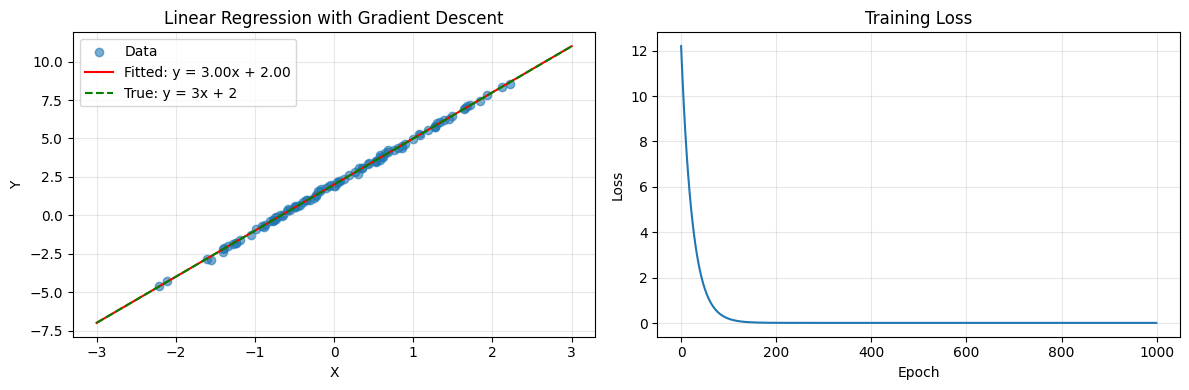

In [ ]:
# Plot the results
plt.figure(figsize=(12, 4))

# Plot 1: Data and fitted line
plt.subplot(1, 2, 1)
x_cpu = x_data.cpu().numpy()
y_cpu = y_data.cpu().numpy()
x_line = torch.linspace(-3, 3, 100).to(device)
y_line = (x_line * w + b).cpu().detach().numpy()
x_line_cpu = x_line.cpu().numpy()

plt.scatter(x_cpu, y_cpu, alpha=0.6, label='Data')
plt.plot(x_line_cpu, y_line.reshape(-1), 'r-', label=f'Fitted: y = {w.item():.2f}x + {b.item():.2f}')
plt.plot(x_line_cpu, 3*x_line_cpu + 2, 'g--', label='True: y = 3x + 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Loss curve
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Key Takeaways

In this tutorial, we covered:

1. **Device-agnostic code**: Always use `device = torch.device(...)` and `.to(device)` for compatibility across different hardware
2. **Tensors**: The fundamental data structure in PyTorch
3. **Operations**: Element-wise and matrix operations on tensors
4. **Autograd**: Automatic differentiation for computing gradients
5. **Neural network layers**: Using `nn.Linear` for linear transformations
6. **Training loop**: Forward pass, loss computation, backward pass, and parameter updates

## Next Steps

- Proceed to the regression tutorial to see a more complete example
- Learn about different loss functions and optimizers
- Explore more complex neural network architectures

Remember to always write device-agnostic code for better portability across different systems!